In [145]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from bs4 import BeautifulSoup
import time
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Chrome options to fix (unknown error: DevToolsActivePort file doesn't exist)
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [10]:
def click_and_scrape_posts(role, driver):
    
    jobs = []
    # Find number of posts on page
    num_posts = 0
    while True:
        try:
            driver.find_element_by_xpath(f"//*[@id='MainCol']/div[1]/ul/li[{num_posts}]")
            num_posts += 1
        except:
            break    
    print(num_posts)
    curr_post = 1
    
    while curr_post <= num_posts:
        # Click on a job posting
        time.sleep(1)
        try:
            job_button = driver.find_element_by_xpath(f"//*[@id='MainCol']/div[1]/ul/li[{curr_post}]")
            job_button.click()
        except:
            print('job_button error')
            pass
        time.sleep(0.5)

        # Attempt to close Sign Up Pop Up if any
        try:
            driver.find_element_by_xpath('//*[@id="JAModal"]/div/div[2]/span').click()
            print('closed sign up page')
        except:
            pass
        
        # Gather necessary information
        try:
            city_state_tag = driver.find_element_by_xpath(f"//*[@id='MainCol']/div[1]/ul/li[{curr_post}]/div[2]/div[2]/span")
            city_state = city_state_tag.text
            print(city_state)
        except:
            city_state = 'None'
            print('No city_state info')
        try:
            salary_range_tag = driver.find_element_by_xpath(f"//*[@id='MainCol']/div[1]/ul/li[{curr_post}]/div[2]/div[3]/div[1]/span")
            salary_range = salary_range_tag.text
        except:
            salary_range = 'None'
            print('No salary_range info')
        try:
            job_description_tag = driver.find_element_by_xpath("//*[@id='JobDescriptionContainer']")
        except:
            print('No job_description info')

        # DEBUG -- Save Info to List of Dictionaries
        try:
            html = job_description_tag.get_attribute('innerHTML')
        except:
            print('No html info')
        try:
            soup = BeautifulSoup(html)
        except:
            pass
        try:
            job_description = soup.find('div', class_='jobDescriptionContent desc').text
        except:
            job_description = 'None'
            print('No job info')
        try:
            jobs.append(
                {
                    "job_title": role,
                    "location": city_state,
                    "salary_range": salary_range,
                    "job_description": job_description
                }
            )
        except:
            print('append job error')
            pass
        
        curr_post += 1
    
    return jobs

In [11]:
def get_job_info(location, role):
    
    # Initialize variables
    driver = webdriver.Chrome()
    driver.set_window_size(1120, 1000)
    url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + role + '"&locKeyword=United%20States&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=false&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []
    next_page_button = driver.find_element_by_xpath('//*[@id="FooterPageNav"]/div/ul/li[7]/a')
    
    # Click the drop down menu for Date Posted
    date_posted_button = driver.find_element_by_xpath('//*[@id="filter_fromAge"]')
    date_posted_button.click()
    
    # Select Date Posted = 2 weeks
    date_range_object = driver.find_element_by_xpath('//*[@id="PrimaryDropdown"]/ul/li[5]')
    date_range_object.click()
    
    curr_page = 1
    num_pages = driver.find_element_by_xpath('//*[@id="MainCol"]/div[2]/div[1]').text.split()[-1]
    num_pages = int(num_pages)
    print(num_pages)
    
    while curr_page <= num_pages:
        print(f"Now Scraping Page {curr_page}")
        job_info = click_and_scrape_posts(role, driver)
        jobs.append(job for job in job_info)
        curr_page += 1
        next_page_button.click()
        
        
    
    # Make list of dictionaries
    output = []
    for page in range(len(jobs)):
        for job in jobs[page]:
            output.append(job)
    return output

In [6]:
jobs = get_job_info('United States', "data analyst")

30
Now Scraping Page 1
31
closed sign up page
Bloomington, IN
closed sign up page
Camden, NJ
Milwaukee, WI
United States
No salary_range info
Greensboro, GA
No salary_range info
Waukegan, IL
Pleasant Prairie, WI
Remote
No salary_range info
Orlando, FL
Orlando, FL
Covington, KY
Fargo, ND
Milwaukee, WI
Chicago, IL
Arlington, VA
Fairlawn, OH
Saint Petersburg, FL
Remote
No salary_range info
Irvington, NY
No salary_range info
North Billerica, MA
Portland, OR
Liverpool, NY
Washington, DC
Plano, TX
Fort Mill, SC
San Bernardino, CA
Boston, MA
No salary_range info
Durham, NC
Industry, CA
No salary_range info
Now Scraping Page 2
31
Houston, TX
New Rochelle, NY
Plymouth, MA
Wilmington, DE
Livermore, CA
Sacramento, CA
Monsey, NY
Newburyport, MA
No salary_range info
Plymouth, MN
Secaucus, NJ
Spartanburg, SC
Dublin, CA
Irvine, CA
San Francisco, CA
Philadelphia, PA
Phoenix, AZ
Ann Arbor, MI
No salary_range info
Norwich, CT
Danbury, CT
Tempe, AZ
No salary_range info
Denver, CO
Tampa, FL
No salary_rang

Los Alamos, NM
Culver City, CA
San Francisco, CA
Jeffersonville, IN
Hurlburt Field, FL
D'Iberville, MS
New York, NY
No salary_range info
Brockton, MA
Salt Lake City, UT
Washington, DC
Washington, DC
Indianapolis, IN
Stockton, CA
No salary_range info
Boston, MA
Chantilly, VA
No salary_range info
San Francisco, CA
Texas
No salary_range info
Los Angeles, CA
Pomona, CA
New York, NY
No salary_range info
United States
No salary_range info
Fort Washington, PA
Now Scraping Page 15
31
Richmond, VA
Washington, DC
Austin, TX
New York, NY
Los Angeles, CA
Washington, DC
Chicago, IL
Laurel, MD
Saint Louis, MO
Arlington, VA
Washington, DC
Washington, DC
Brooklyn, NY
Lavonia, GA
No salary_range info
Corvallis, OR
Gorham, NH
Eugene, OR
No salary_range info
San Francisco, CA
New York, NY
Holyoke, MA
Alexandria, VA
Hartsville, SC
Remote
No salary_range info
Remote
No salary_range info
Atlanta, GA
San Leandro, CA
No salary_range info
Durham, NC
Somerville, MA
No salary_range info
Leominster, MA
No salary_

Remote
No salary_range info
Bethesda, MD
Fort Lauderdale, FL
Remote
No salary_range info
Houston, TX
Cambridge, MA
Getzville, NY
Monrovia, CA
Phoenix, AZ
San Jose, CA
Hartford, CT
No salary_range info
Indianapolis, IN
No salary_range info
Now Scraping Page 29
31
Getzville, NY
Phoenix, AZ
San Jose, CA
Hartford, CT
No salary_range info
Indianapolis, IN
No salary_range info
Urbandale, IA
No salary_range info
Remote
No salary_range info
Remote
No salary_range info
New York, NY
Chicago, IL
United States
No salary_range info
Irvine, CA
Chesapeake, VA
Getzville, NY
Huntsville, AL
Peoria, IL
North Chicago, IL
No salary_range info
Atlanta, GA
Charlotte, NC
Kansas City, MO
No salary_range info
Tampa, FL
Remote
No salary_range info
Lisle, IL
Little Rock, AR
White Plains, NY
Sacramento, CA
Butler, PA
No salary_range info
San Antonio, TX
Santa Maria, CA
Now Scraping Page 30
31
Maple Grove, MN
No salary_range info
Quantico, VA
No salary_range info
San Diego, CA
Pittsburgh, PA
Dallas, TX
Arlington, V

In [7]:
len(jobs)

884

In [9]:
# Results of scraping 1st 30 pages of GlassDoor - Last 2 Weeks (4/29/2021)
pd.DataFrame(jobs)

,job_title,location,salary_range,job_description
0,data analyst,"Bloomington, IN",$44K - $84K (Glassdoor est.),"National Salvage, an industry leader, seeks a ..."
1,data analyst,"Camden, NJ",$65K - $131K (Glassdoor est.),"Diversity of backgrounds, ideas, thoughts, and..."
2,data analyst,"Milwaukee, WI",$65K - $79K (Employer est.),Financial Data AnalystCorporate Headquarters12...
3,data analyst,United States,None,TeamSoft’s client is looking for a Data Analys...
4,data analyst,"Greensboro, GA",None,Business Intelligence Data AnalystLocation: Re...
...,...,...,...,...
879,data analyst,"Philadelphia, PA",None,"Founded in 2007, The Oncology Institute of Hop..."
880,data analyst,North Chesterfield,None,"Title: Data Analyst\n\nLocation: Chesterfield,..."
881,data analyst,"Raleigh, NC",$42K - $85K (Glassdoor est.),JMA Pediatrics is a premier pediatric practice...
882,data analyst,"Milwaukee, WI",$45K - $80K (Glassdoor est.),"PurposeUnder general direction, review input a..."


In [13]:
# Save Results to csv file -- RENAME file to avoid overwriting
data_analyst_postings = pd.DataFrame(jobs)
data_analyst_postings.to_csv('data_analyst_postings.csv')

In [23]:
# Set up Geopandas states
states = gpd.read_file('data/cb_2018_us_state_20m.shp')
#states = states.to_crs("EPSG:3395")

<AxesSubplot:>

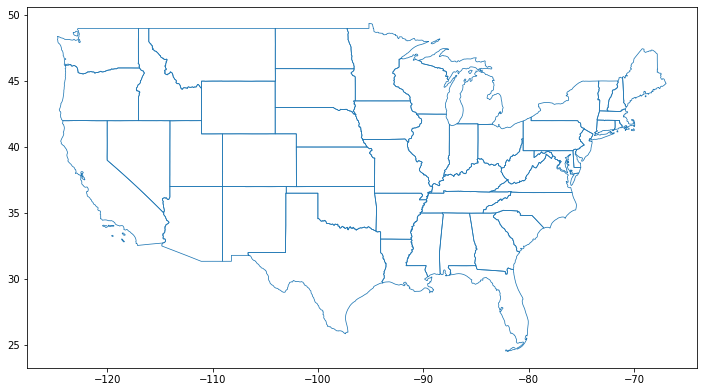

In [35]:
states = states[states['NAME'] != 'Alaska']
states = states[states['NAME'] != 'Hawaii']
states = states[states['NAME'] != 'Puerto Rico']
states.boundary.plot(figsize=(12, 12), linewidth=.75)

In [62]:
data_analyst_postings['state'] = 0

In [83]:
# Extract States from Postings -- could be more thorough e.g. convert Florida to FL
# instead of skipping
state_abbr = []
for idx, location in data_analyst_postings[['location']].iterrows():
    print(data_analyst_postings['location'][idx])
    try:
        word = data_analyst_postings['location'][idx].split()[-1]
        if len(word) <= 2:
            data_analyst_postings['state'][idx] = word
            #print(word)
        else:
            data_analyst_postings['state'][idx] = 1
    except:
        pass

Bloomington, IN
Camden, NJ
Milwaukee, WI
United States
Greensboro, GA
Waukegan, IL
Pleasant Prairie, WI
Remote
Orlando, FL
Orlando, FL
Covington, KY
Fargo, ND
Milwaukee, WI
Chicago, IL
Arlington, VA
Fairlawn, OH
Saint Petersburg, FL
Remote
Irvington, NY
North Billerica, MA
Portland, OR
Liverpool, NY
Washington, DC
Plano, TX
Fort Mill, SC
San Bernardino, CA
Boston, MA
Durham, NC
Industry, CA
Houston, TX
New Rochelle, NY
Plymouth, MA
Wilmington, DE
Livermore, CA
Sacramento, CA
Monsey, NY
Newburyport, MA
Plymouth, MN
Secaucus, NJ
Spartanburg, SC
Dublin, CA
Irvine, CA
San Francisco, CA
Philadelphia, PA
Phoenix, AZ
Ann Arbor, MI
Norwich, CT
Danbury, CT
Tempe, AZ
Denver, CO
Tampa, FL
Reston, VA
Camden, NJ
Miami, FL
Chicago, IL
Oxnard, CA
West Palm Beach, FL
Portsmouth, NH
Buffalo, NY
Allen Park, MI
Chatsworth, CA
Auburn Hills, MI
Deer Park, TX
Beaverton, OR
Saint Louis, MO
Dearborn, MI
Remote
Eagle, CO
Benton Harbor, MI
Palm Springs, FL
Florida
Saint Louis, MO
Washington, DC
Post Falls, ID
S

<ipython-input-83-11408ff51637>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analyst_postings['state'][idx] = word
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



Falls Church, VA
Dallas, TX
San Diego, CA
Houston, TX
Durham, NC
New York, NY
Houston, TX
Bronx, NY
Atlanta, GA
Linthicum Heights, MD
New York, NY
Charlotte, NC
Everett, WA
Mount Laurel, NJ
Boston, MA
San Diego, CA
Tampa, FL
Saint Paul, MN
Holyoke, MA
Remote
United States
Remote
Houston, TX
Fort Lauderdale, FL
Phoenix, AZ
Getzville, NY
Urbandale, IA
Indianapolis, IN
Remote
Chicago, IL
North Chicago, IL
Getzville, NY
Huntsville, AL
Peoria, IL
Magnolia, TX
Kansas City, MO
Remote
Little Rock, AR
Butler, PA
Sacramento, CA
Santa Maria, CA
San Antonio, TX
Austin, TX
Quincy, MA
Norcross, GA
Portland, OR
Maple Grove, MN
Philadelphia, PA
Santa Maria, CA
San Antonio, TX
Quincy, MA
Austin, TX
Norcross, GA
Magnolia, TX
Portland, OR
Maple Grove, MN
Philadelphia, PA
Quantico, VA
San Diego, CA
Charlotte, NC
Jacksonville, FL
Clearwater, FL
Huntsville, AL
Detroit, MI
Seaside, CA
Boston, MA
Richmond, VA
Exton, PA
Chicago, IL
Philadelphia, PA
New York, NY
Cerritos, CA
Raleigh, NC
North Chesterfield
Milw

In [141]:
# Remove Faulty Entries and Make STUSPS, Count DataFrame
data = data_analyst_postings[data_analyst_postings['state'] != 1]
data = data[data['state'] != 'AK']

STUSPS = list(data.groupby('state').count()[1:].reset_index()['state'])
count = list(data.groupby('state').count()[1:].reset_index()['location'])

data_dict = {'STUSPS': STUSPS, 'count': count}
data = pd.DataFrame(data=data_dict)

In [142]:
data.head()

,STUSPS,count
0,AL,8
1,AR,3
2,AZ,9
3,CA,113
4,CO,5


In [143]:
merged_df = states.merge(data)

In [144]:
merged_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",19
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",6
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",1
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",13
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",41
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",1
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",7
7,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",8
8,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",3
9,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.04919 31.79655, -109.04830 32.0...",2


# Plotting!

<AxesSubplot:title={'center':'Heat Map of Data Analyst Jobs in US - 2021'}>

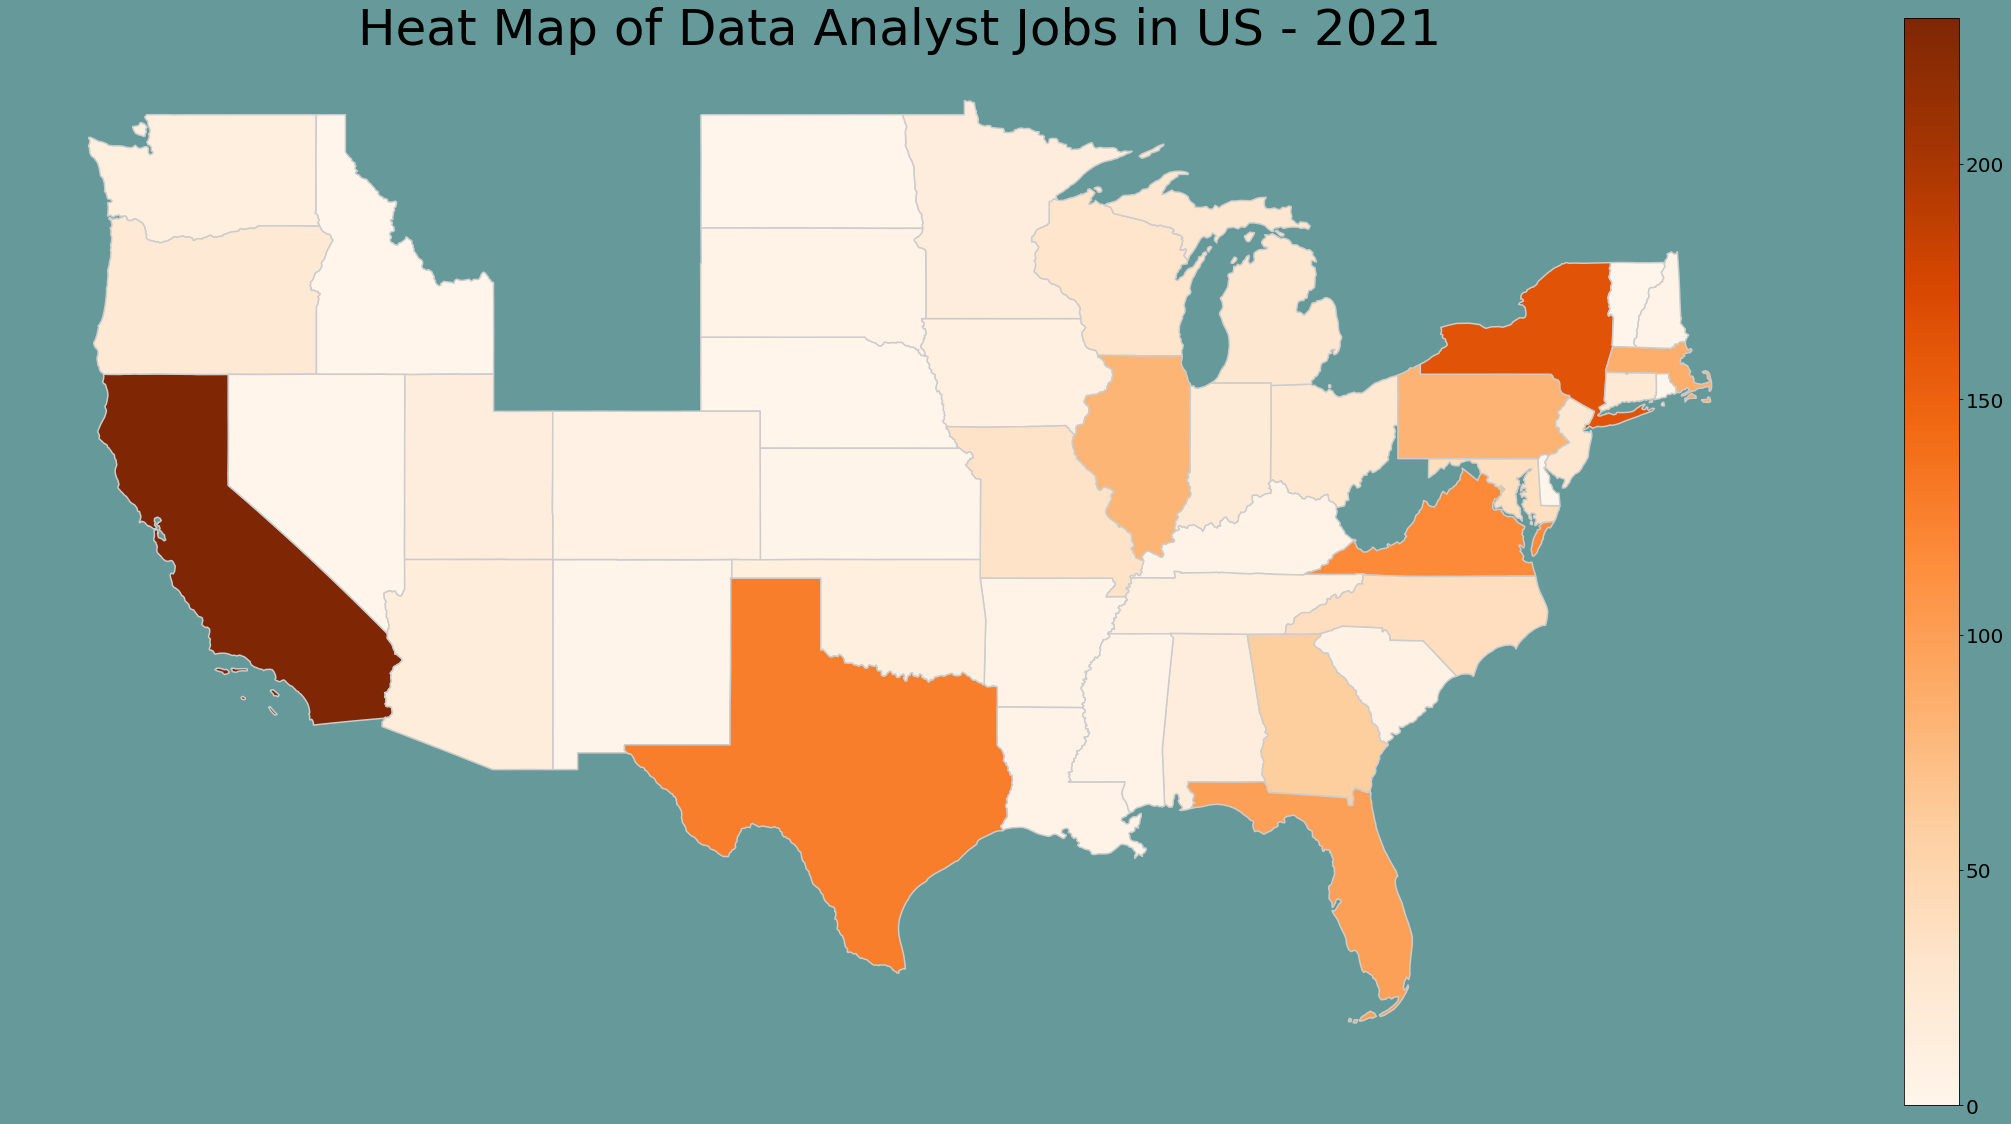

In [174]:
# Got to look closer at this code to see what it is doing - taken from:
# https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55
fig, ax = plt.subplots(1, figsize=(40, 20), facecolor=(0.4, 0.6, 0.6))
ax.axis('off')
ax.set_title('Heat Map of Data Analyst Jobs in US - 2021', fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged_df.plot('count', cmap=color, linewidth=1.5, ax=ax, edgecolor='0.8', figsize=(40,20))